# Uber Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Desktop/UberDataset.csv")
data.head()

In [15]:
# Check for null values in the entire DataFrame
null_values = data.isnull()

# Sum up the null values in each column
null_counts = null_values.sum()

# Display the count of null values in each column
print(null_counts)

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64


In [17]:
# Remove rows with any null value
data_cleaned = data.dropna()

# Display the shape of the cleaned DataFrame
print("Original shape:", data.shape)
print("Cleaned shape:", data_cleaned.shape)

Original shape: (1156, 7)
Cleaned shape: (653, 7)


In [18]:
# Remove columns with any null value
data_cleaned = data.dropna(axis=1)

# Display the shape of the cleaned DataFrame
print("Original shape:", data.shape)
print("Cleaned shape:", data_cleaned.shape)

Original shape: (1156, 7)
Cleaned shape: (1156, 2)


In [19]:
# Impute missing values in the 'MILES' column with the mean
data['MILES'].fillna(data['MILES'].mean(), inplace=True)

# Check if there are any null values left
print(data.isnull().sum())

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64


In [33]:
data_cleaned

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


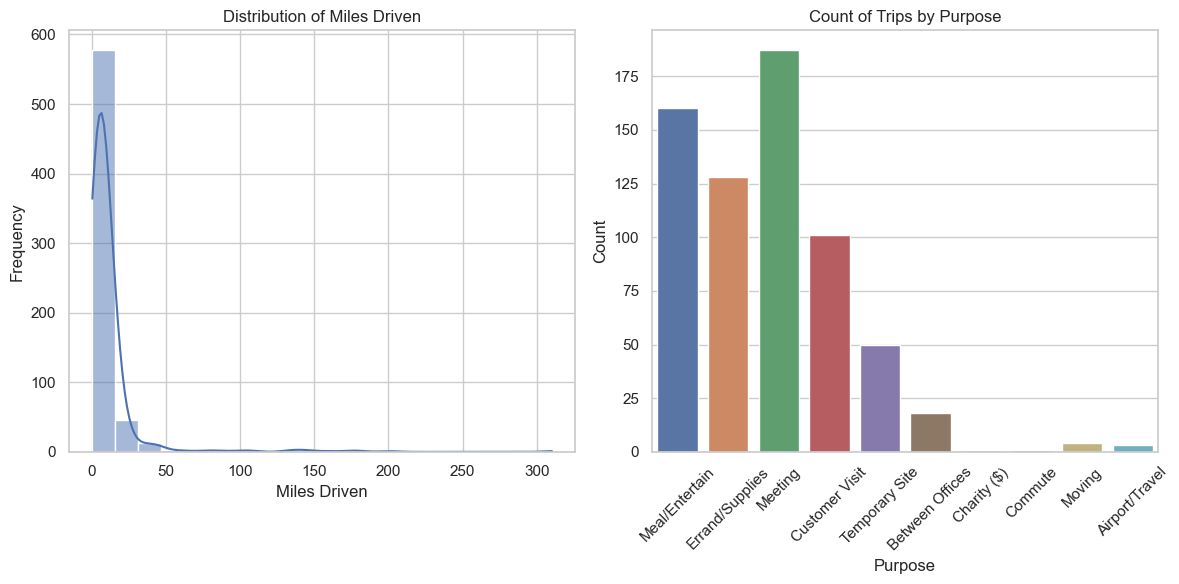

In [23]:
# Drop rows with any missing values
data_cleaned = data.dropna()

# Basic visualizations
plt.figure(figsize=(12, 6))

# Histogram of Miles Driven
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['MILES'], bins=20, kde=True)
plt.xlabel('Miles Driven')
plt.ylabel('Frequency')
plt.title('Distribution of Miles Driven')

# Count of Trips by Purpose
plt.subplot(1, 2, 2)
sns.countplot(data=data_cleaned, x='PURPOSE')
plt.xticks(rotation=45)
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Count of Trips by Purpose')

plt.tight_layout()
plt.show()

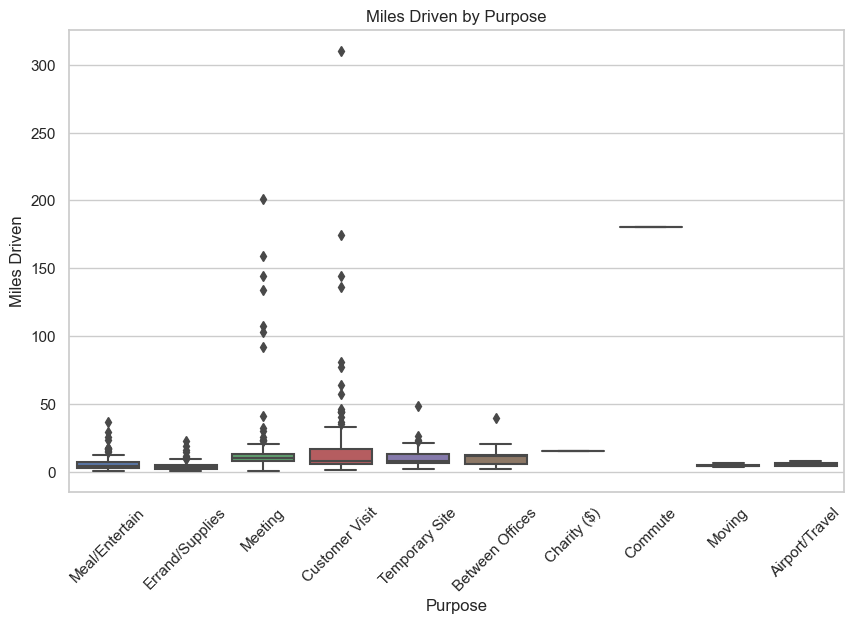

In [24]:
# Box Plot of Miles by Purpose
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned, x='PURPOSE', y='MILES')
plt.xticks(rotation=45)
plt.xlabel('Purpose')
plt.ylabel('Miles Driven')
plt.title('Miles Driven by Purpose')
plt.show()

# Create a pivot table for the heatmap
pivot_table = data_cleaned.pivot_table(index='START', columns='STOP', values='MILES', aggfunc='mean')

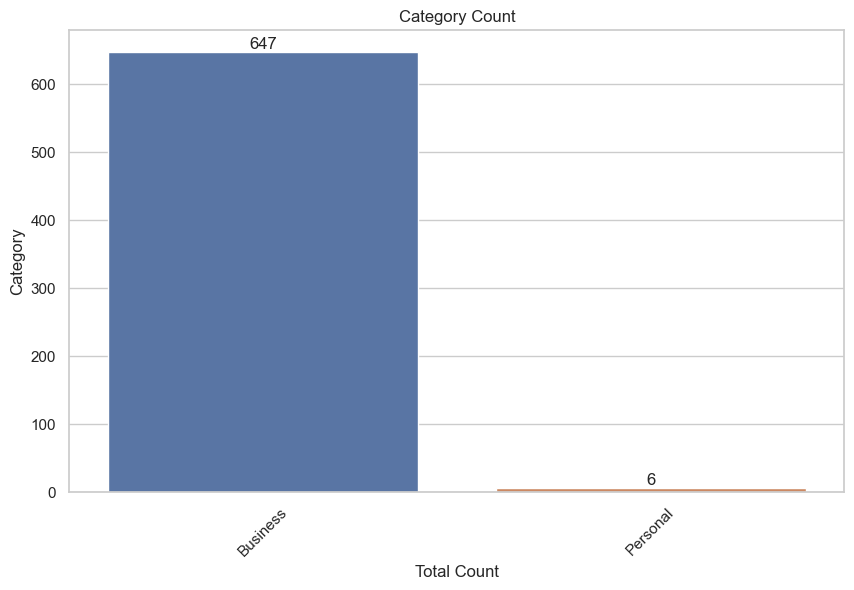

In [44]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="CATEGORY", data=data_cleaned)
plt.title("Category Count")
plt.xticks(rotation=45)
plt.xlabel("Total Count")
plt.ylabel("Category")

for container in ax.containers:
    ax.bar_label(container)

In [49]:
# Convert date columns to datetime format with mixed format handling
data_cleaned['START_DATE'] = pd.to_datetime(data_cleaned['START_DATE'], format='%m-%d-%Y %H:%M', errors='coerce')
data_cleaned['END_DATE'] = pd.to_datetime(data_cleaned['END_DATE'], format='%m-%d-%Y %H:%M', errors='coerce')

# Drop rows with invalid dates
data_cleaned = data_cleaned.dropna(subset=['START_DATE', 'END_DATE'])

# Extract day of the week and hour of the day
data_cleaned['DayOfWeek'] = data_cleaned['START_DATE'].dt.day_name()
data_cleaned['Hour'] = data_cleaned['START_DATE'].dt.hour

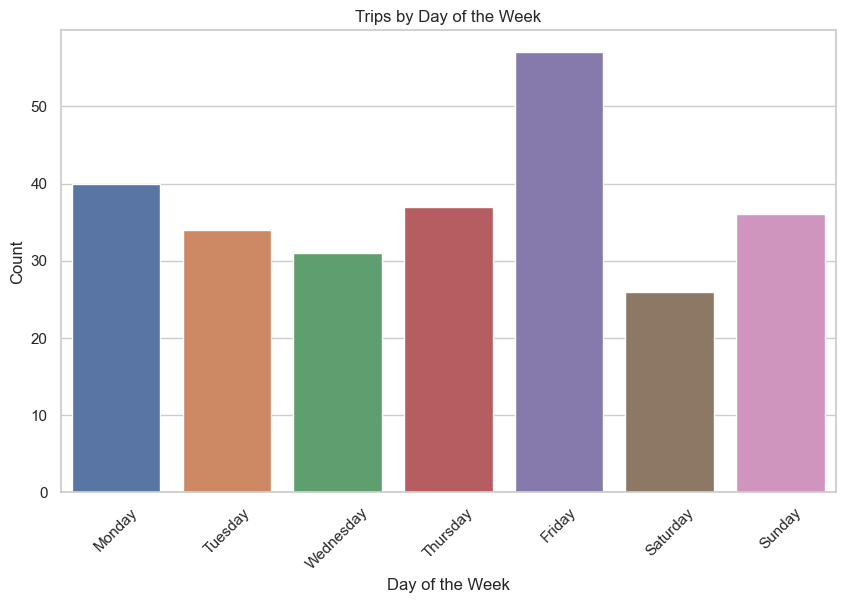

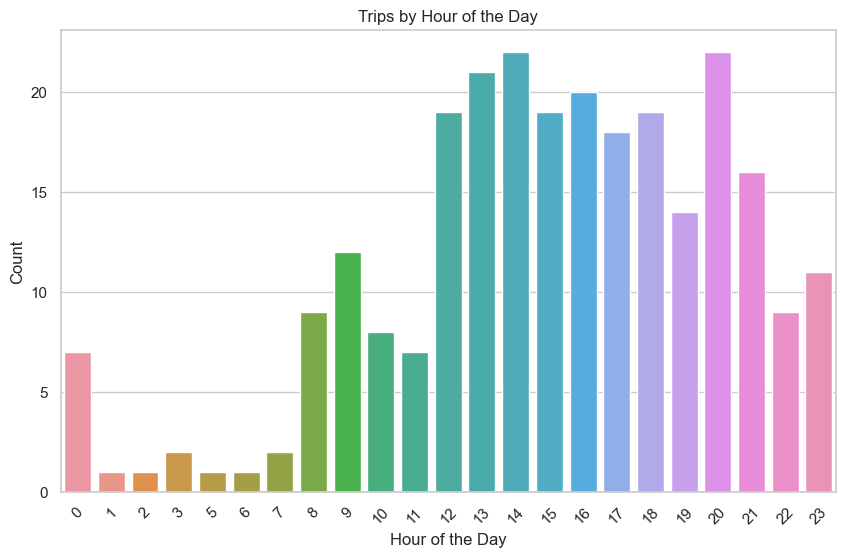

In [50]:
# Day of the Week Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Trips by Day of the Week')
plt.xticks(rotation=45)
plt.show()

# Hourly Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Trips by Hour of the Day')
plt.xticks(rotation=45)
plt.show()

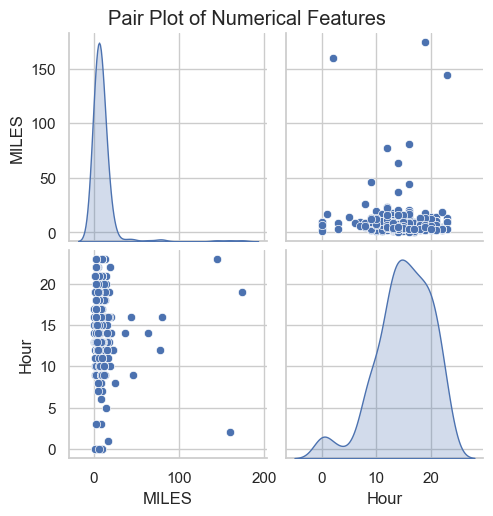

In [53]:
# Pair Plot (excluding non-numeric columns)
sns.pairplot(data_cleaned.select_dtypes(include='number'), diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

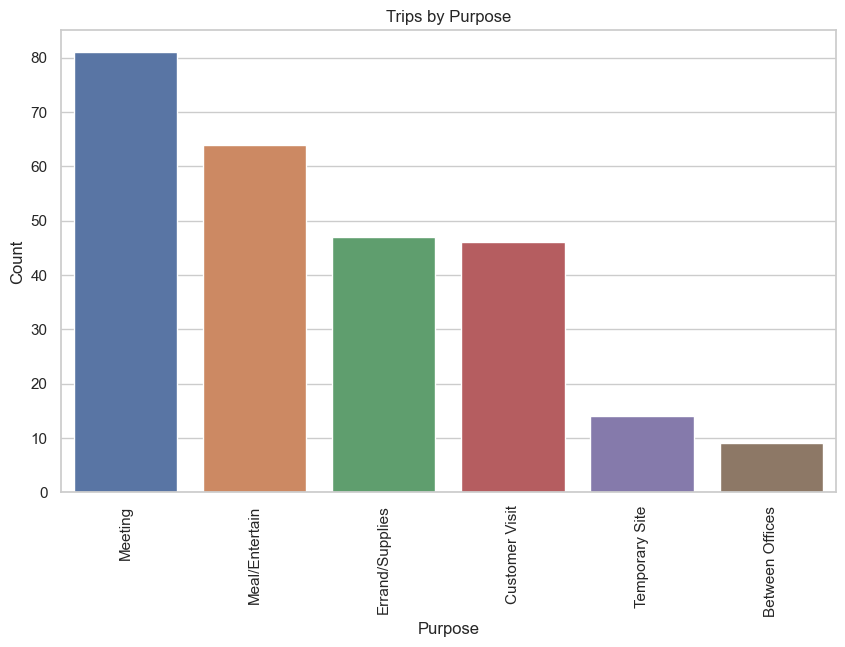

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='PURPOSE', order=data_cleaned['PURPOSE'].value_counts().index)
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Trips by Purpose')
plt.xticks(rotation=90)
plt.show()

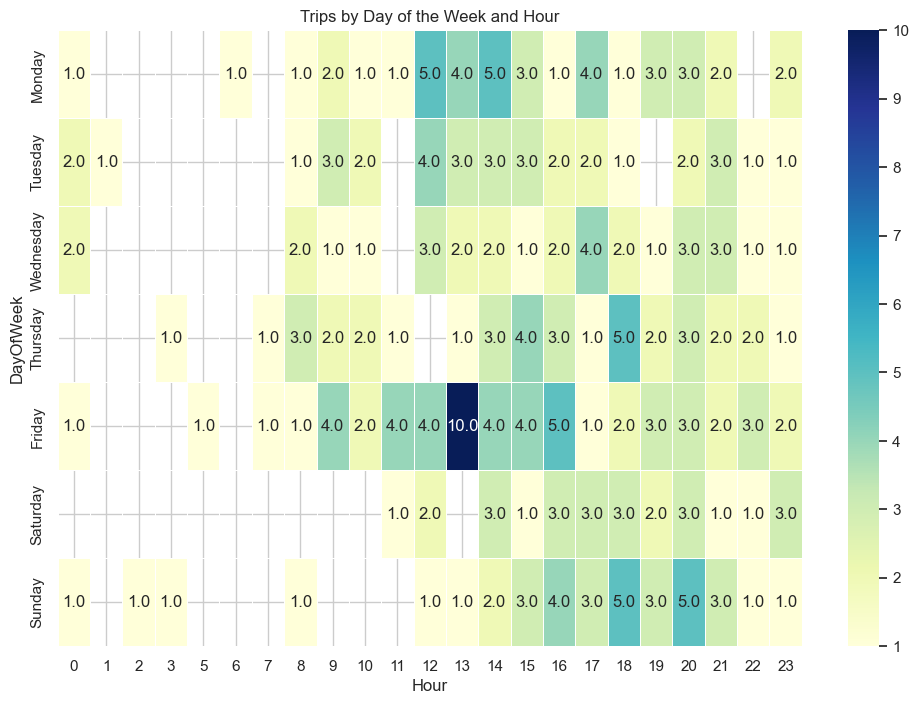

In [59]:
# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a pivot table for the heatmap
pivot_table_day_hour = data_cleaned.pivot_table(index='DayOfWeek', columns='Hour', values='MILES', aggfunc='count')
pivot_table_day_hour = pivot_table_day_hour.reindex(day_order)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_day_hour, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Trips by Day of the Week and Hour')
plt.show()

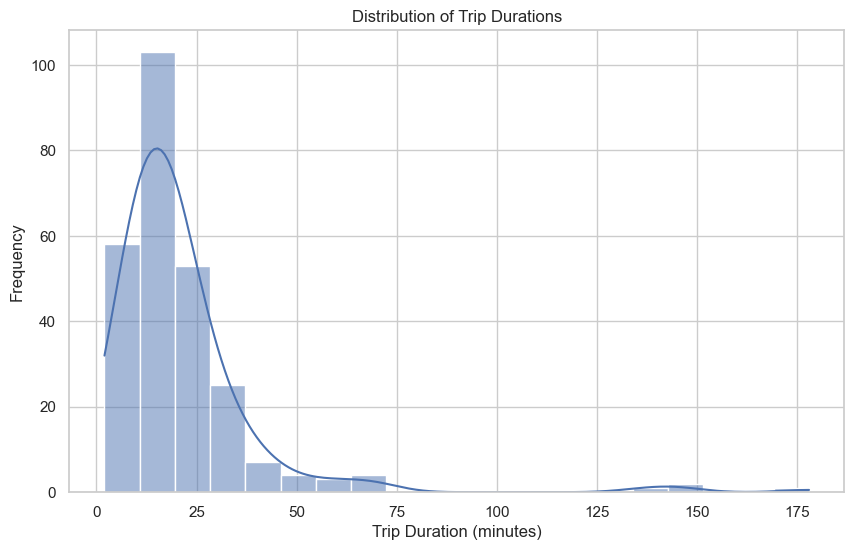

In [58]:
data_cleaned['DURATION_MINUTES'] = (data_cleaned['END_DATE'] - data_cleaned['START_DATE']).dt.total_seconds() / 60
plt.figure(figsize=(10, 6))
sns.histplot(data=data_cleaned, x='DURATION_MINUTES', bins=20, kde=True)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.show()

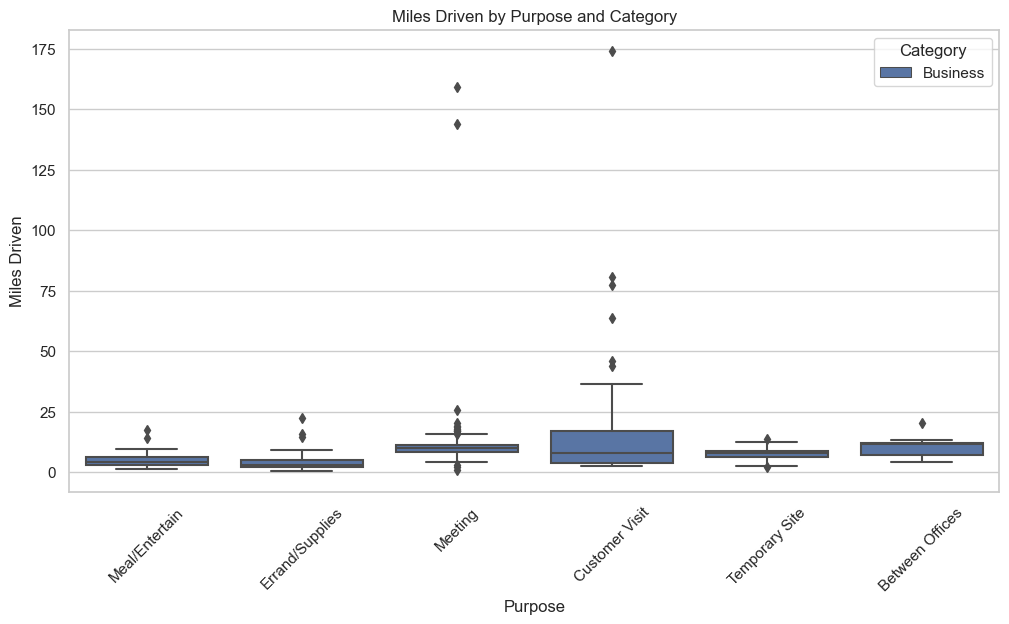

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned, x='PURPOSE', y='MILES', hue='CATEGORY')
plt.xlabel('Purpose')
plt.ylabel('Miles Driven')
plt.title('Miles Driven by Purpose and Category')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

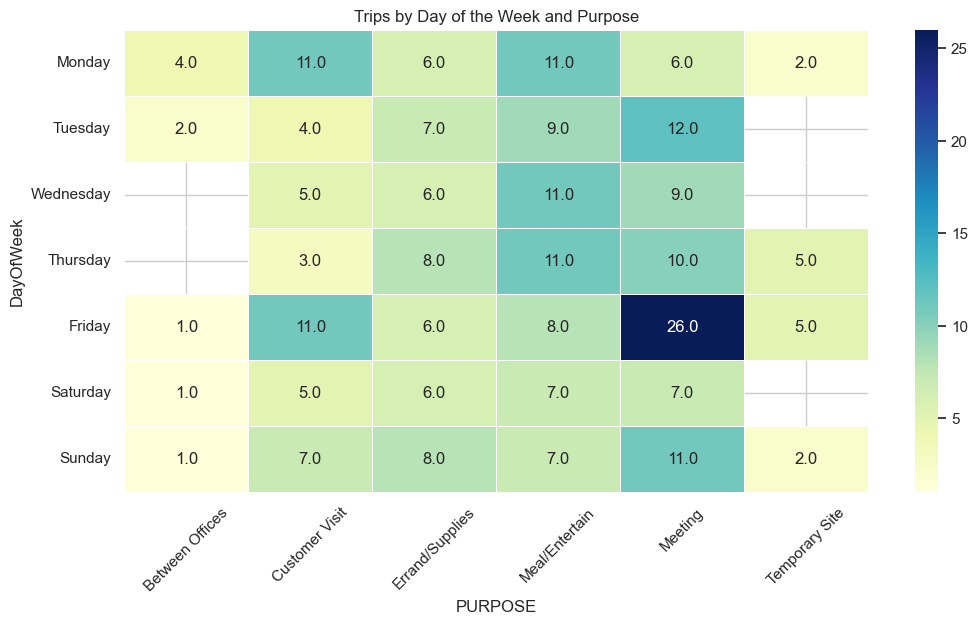

In [64]:
plt.figure(figsize=(12, 6))
pivot_table_day_purpose = data_cleaned.pivot_table(index='DayOfWeek', columns='PURPOSE', values='MILES', aggfunc='count')
pivot_table_day_purpose = pivot_table_day_purpose.reindex(day_order)
sns.heatmap(pivot_table_day_purpose, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Trips by Day of the Week and Purpose')
plt.xticks(rotation=45)
plt.show()

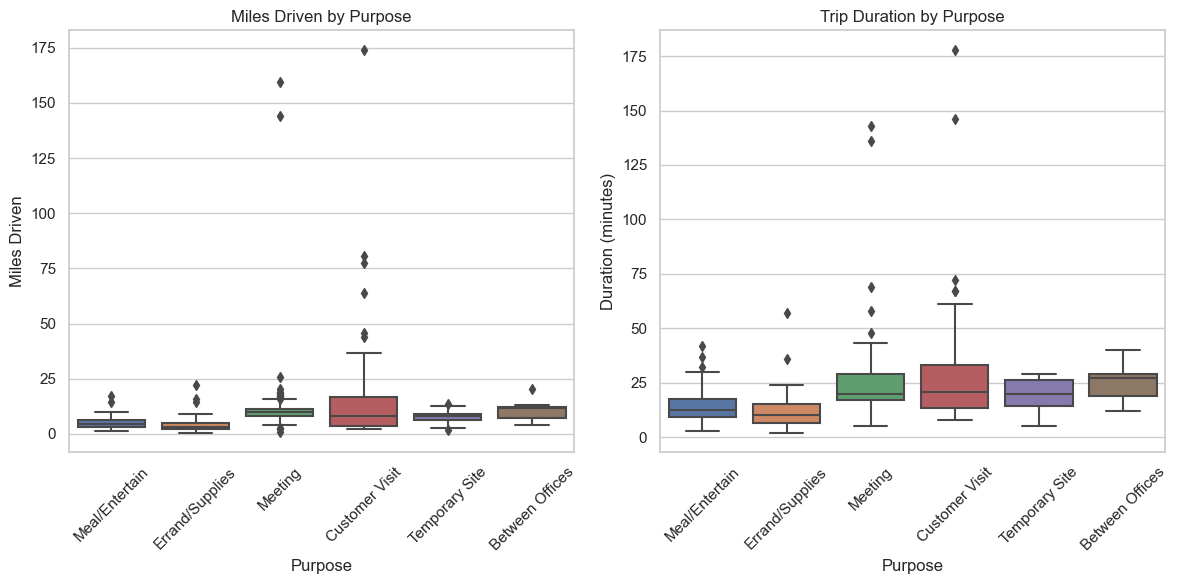

In [65]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=data_cleaned, x='PURPOSE', y='MILES')
plt.xlabel('Purpose')
plt.ylabel('Miles Driven')
plt.title('Miles Driven by Purpose')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=data_cleaned, x='PURPOSE', y='DURATION_MINUTES')
plt.xlabel('Purpose')
plt.ylabel('Duration (minutes)')
plt.title('Trip Duration by Purpose')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

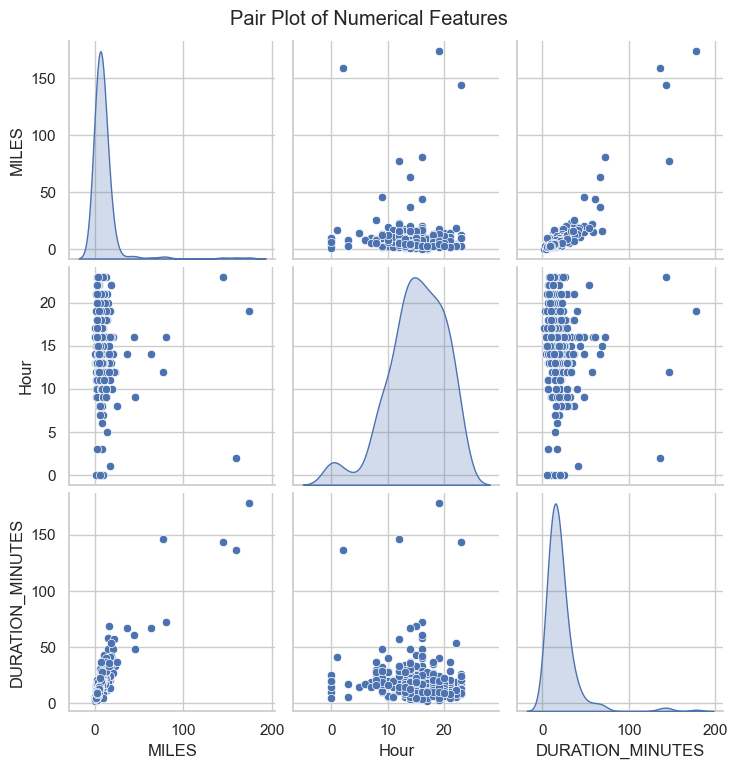

In [68]:
# Pair Plot without Hue
sns.pairplot(data_cleaned.select_dtypes(include='number'), diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# End of Uber Analysis